In [1]:
import json
import os
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd 
import numpy as np
import tqdm
import re

In [2]:
# Set the font to Times New Roman
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

In [3]:
rcParams['font.weight'] = 'bold'
rcParams['axes.titleweight'] = 'bold'
rcParams['axes.labelweight'] = 'bold'

In [4]:
rcParams['axes.titlesize'] = 18
rcParams['axes.labelsize'] = 18
rcParams['xtick.labelsize'] = 18
rcParams['ytick.labelsize'] = 18
rcParams['legend.fontsize'] = 18

In [5]:
def plot_smoothed_scores(score_lists, 
                         window_size, 
                         model_names, 
                         colors=None, 
                         line_styles=None, 
                         line_width=1.0, 
                         landscape=False, 
                         file_name='image'):

    def smooth_data(data):
        smoothed_data = []
        for i in range(len(data)):
            start = max(0, i - window_size)
            end = i + 1
            window_data = data[start:end]
            smoothed_data_point = sum(window_data) / len(window_data)
            smoothed_data.append(smoothed_data_point)
        return smoothed_data #[5:]

    num_models = len(score_lists)
    
    # Define default colors if not provided
    if colors is None:
        colors = ['#d62728', '#2ca02c', '#1f77b4', '#ff7f0e', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

    # Define default line styles if not provided
    if line_styles is None:
        line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--']

    # Determine the figure size based on landscape mode
    if landscape:
        figsize = (12, 6)
    else:
        figsize = (8, 6)

    # Create a new figure with specific settings for a research paper
    plt.figure(figsize=figsize)
    ax = plt.gca()

    for i in range(num_models):
        # Smooth the data for each model
        if model_names[i] in ['OnlineAutoML','OAML']:
            smoothed_scores = smooth_data(score_lists[i])
        else:
            smoothed_scores = smooth_data(score_lists[i][5:])
        
        #smoothed_scores = score_lists[i]

        # Plot smoothed metric scores with different colors, line styles, and line widths
        #plt.plot(range(1, len(smoothed_scores) + 1), smoothed_scores, label=f"{model_names[i]}({score_lists[i][-1]:.2f})", color=colors[i], linestyle=line_styles[i], linewidth=line_width)
        plt.plot(range(1, len(smoothed_scores) + 1), smoothed_scores, label=f"{model_names[i]}", color=colors[i], linestyle=line_styles[i], linewidth=line_width)

    # Customize the axis labels and title
    if landscape:
        plt.xlabel('#Instances (in thousands)', fontsize=12)
        plt.ylabel('Prequential R2 (%)', fontsize=12)
        #plt.title(dataset_name.upper(), fontsize=14,y=1.06)
    else:
        plt.xlabel('#Instances (in thousands)', fontsize=12)
        plt.ylabel('Prequential R2 (%)', fontsize=12)
        #plt.title(dataset_name.upper(), fontsize=14,y=1.06)

    # Customize the tick labels and grid
    plt.xticks(fontsize=10)  # Set x-axis ticks in thousands
    plt.yticks(fontsize=10)  # Set y-axis ticks in steps of 0.05
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add a legend
    #plt.legend(fontsize=14, ncol=7, loc='upper center', bbox_to_anchor=(0.5, 1.5))
    plt.legend(fontsize=10)

    # Adjust the layout and save the figure as a high-resolution image
    plt.tight_layout()
    
    if landscape:
        #pass
        plt.savefig(f'CHARTS/{file_name}.png', dpi=300)  # Save as a high-resolution image in landscape mode
    else:
        pass
        plt.savefig(f'CHARTS/{file_name}.png', dpi=300)  # Save as a high-resolution image in normal mode
    
    plt.show()

In [6]:
def plot_scores(score_lists, 
                model_names, 
                colors=None, 
                line_styles=None, 
                line_width=1.0, 
                landscape=False,
                font_size=12,
                file_name='image',
                y_limits=None):

    num_models = len(score_lists)
    
    # Define default colors if not provided
    if colors is None:
        colors = ['#d62728', '#2ca02c', '#1f77b4', '#ff7f0e', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

    # Define default line styles if not provided
    if line_styles is None:
        line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--']

    # Determine the figure size based on landscape mode
    if landscape:
        figsize = (12, 6)
    else:
        figsize = (8, 6)

    # Create a new figure with specific settings for a research paper
    plt.figure(figsize=figsize)
    ax = plt.gca()

    for i in range(num_models):
        scores = score_lists[i]  # Use the complete score list
        plt.plot(range(1, len(scores) + 1), scores, label=f"{model_names[i]}", color=colors[i], linestyle=line_styles[i], linewidth=line_width)

    # Customize the axis labels and title
    plt.xlabel('#Instances (in thousands)', fontsize=font_size)
    plt.ylabel('Prequential RMSE', fontsize=font_size)

    # Set y-axis limits if provided
    if y_limits is not None:
        plt.ylim(y_limits)

    # Customize the tick labels and grid
    plt.xticks(fontsize=font_size)  # Set x-axis ticks in thousands
    plt.yticks(fontsize=font_size)  # Set y-axis ticks in steps of 0.05
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add a legend
    plt.legend(fontsize=font_size)
    #plt.legend(fontsize=font_size-1.5, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=num_models)

    # Adjust the layout and save the figure as a high-resolution image
    plt.tight_layout()
    plt.savefig(f'CHARTS/{file_name}.png', dpi=300)  # Save as a high-resolution image
    plt.show()

In [7]:
records = os.listdir("FINAL_TEMP/")

In [8]:
records = [_ for _ in records if _.split(".")[-1]=='json']

In [9]:
records = sorted(records)

In [10]:
records

['ARFR_FriedmanGra.json',
 'ARFR_FriedmanGsg.json',
 'ARFR_FriedmanLea.json',
 'ARFR_House8L.json',
 'ARFR_MetroTraffic.json',
 'ARFR_abalone.json',
 'ARFR_ailerons.json',
 'ARFR_bike.json',
 'ARFR_cpu_activity.json',
 'ARFR_elevators.json',
 'ARFR_fried.json',
 'ARFR_hyperA.json',
 'ARFR_kin8nm.json',
 'ARFR_white_wine.json',
 'ASML_REG_BEST_FriedmanGra.json',
 'ASML_REG_BEST_FriedmanGsg.json',
 'ASML_REG_BEST_FriedmanLea.json',
 'ASML_REG_BEST_House8L.json',
 'ASML_REG_BEST_MED_FriedmanGra.json',
 'ASML_REG_BEST_MED_FriedmanGsg.json',
 'ASML_REG_BEST_MED_FriedmanLea.json',
 'ASML_REG_BEST_MED_House8L.json',
 'ASML_REG_BEST_MED_MetroTraffic.json',
 'ASML_REG_BEST_MED_abalone.json',
 'ASML_REG_BEST_MED_ailerons.json',
 'ASML_REG_BEST_MED_bike.json',
 'ASML_REG_BEST_MED_cpu_activity.json',
 'ASML_REG_BEST_MED_elevators.json',
 'ASML_REG_BEST_MED_fried.json',
 'ASML_REG_BEST_MED_hyperA.json',
 'ASML_REG_BEST_MED_kin8nm.json',
 'ASML_REG_BEST_MED_white_wine.json',
 'ASML_REG_BEST_MetroTra

In [12]:
def extract_name_from_file_names(file_name,model_name):
    
    pattern = f'{model_name}_(.*?).json'

    match = re.search(pattern, file_name)
    
    if match:
        return  match.group(1)

    return None

In [13]:
models = [
    'ASML_REG',
    'ASML_REG_BEST',
    'ASML_REG_MED',
    # 'ASML_REG_BEST_MED',
    'EAML_REG',
    'CHACHA',
    'SOKNL',
    'ARFR',
    'HATR'
]

In [14]:
dataset_name_list = [
    'ailerons',
    'elevators',
    'fried',
    'hyperA',
    'FriedmanGsg',
    'FriedmanGra',
    'FriedmanLea',
    'kin8nm',
    'abalone',
    'bike',
    'House8L',
    'MetroTraffic',
    'cpu_activity',
    'white_wine',
]

In [43]:
# Chnage Dataset anme on by one from dataset list given above
dataset_name = 'MetroTraffic'
dataset_name

'MetroTraffic'

In [44]:
model_names = []
r2_scores_list = []
rmse_scores_list = []
times_list = []
memeories_list = []
for model_name in tqdm.tqdm(models):
    for record in records:
            dn = extract_name_from_file_names(record,model_name)
            #print(dn)
            if dataset_name==dn:
                with open(f'FINAL_TEMP/{record}', 'r') as json_file:
                    record_dict = json.load(json_file)
                model_names.append(record_dict['model'])
                r2_scores_list.append([i*100 for i in record_dict['windows_scores']['coefficient of determination']])
                rmse_scores_list.append(record_dict['windows_scores']['root mean squared error'])
                times_list.append(record_dict['time'])
                memeories_list.append([abs(i) for i in record_dict['memory']])

100%|█████████████████████████████████████████████| 8/8 [00:00<00:00, 31.12it/s]


In [45]:
model_names

['ASML_REG',
 'ASML_REG_BEST',
 'ASML_REG_MED',
 'EAML_REG',
 'CHACHA',
 'SOKNL',
 'ARFR',
 'HATR']

In [46]:
model_names = [
    'ASML-REG',
 'ASML-REG-best',
 'ASML-REG-med',
 'EAML-REG',
 'CHACHA',
 'SOKNL',
 'ARFR',
 'HATR'
]

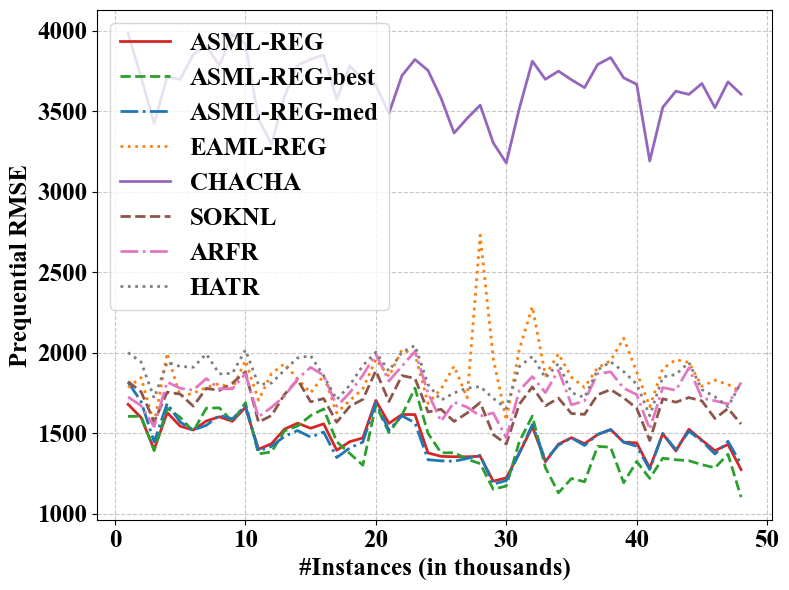

In [47]:
plot_scores(score_lists=rmse_scores_list,
                     #window_size=1,
                     model_names=model_names,
                     line_width=2.0,
                     landscape=False,
            font_size=18,
                     file_name=f'asml_reg_comp_baselines_{dataset_name}') # name of the model to save in folder

# Memory and Time Usage Plot

In [25]:
file_name = "asml_reg__memory_comp_plot"

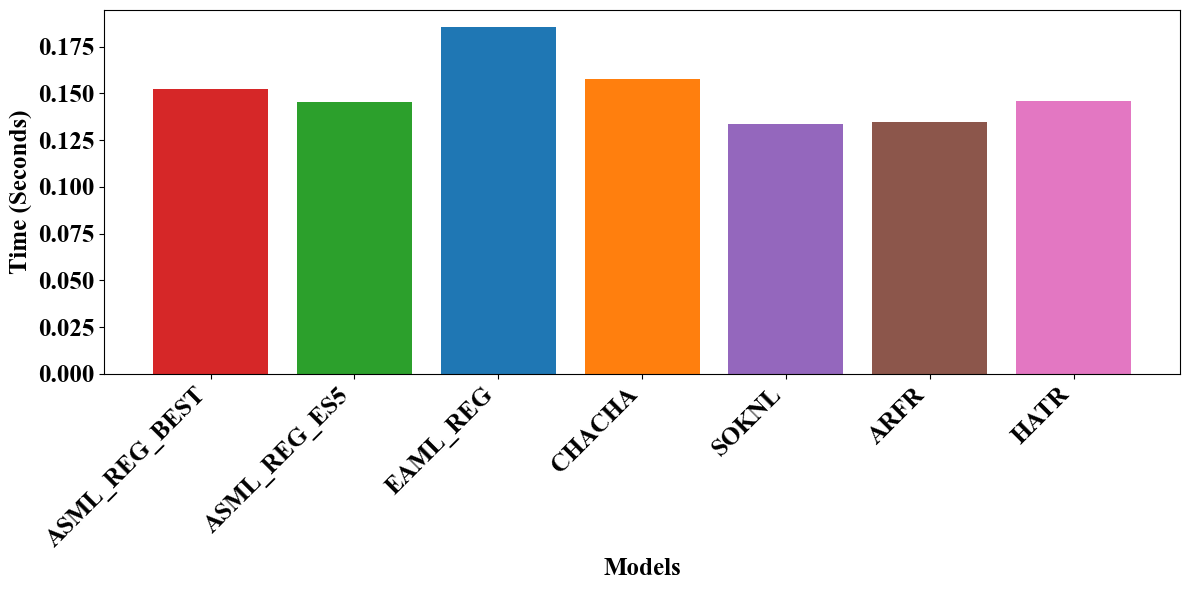

In [26]:
import matplotlib.pyplot as plt

# Data
models = ["ASML_REG_BEST", "ASML_REG_ES5", "EAML_REG", "CHACHA", "SOKNL", "ARFR", "HATR"]
time_seconds =     [0.15205, 0.14539, 0.18529, 0.15773, 0.13350, 0.13467, 0.14578]
#memory_mb =  [0.39943, 0.16247, 0.40851, 0.63005, 0.23537, 0.25033, 0.19352]

# Color sequence
colors = ['#d62728', '#2ca02c', '#1f77b4', '#ff7f0e', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Set the figsize
plt.figure(figsize=(12, 6))

# Plotting the bar chart with specified colors
plt.bar(models, time_seconds, color=colors)
#plt.bar(models, memory_mb, color=colors)
plt.xlabel('Models', fontsize=18)
plt.ylabel('Time (Seconds)', fontsize=18)
#plt.ylabel('Memory (MB)', fontsize=18)
#plt.title('Execution Time for Different Models')
plt.xticks(rotation=45, ha='right', fontsize=18)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=18)
plt.tight_layout()  # Ensure labels are not cut off


#plt.savefig(f'charts/{file_name}.png',dpi=300,bbox_inches='tight')
# Show the plot
plt.show()